# 1. KNN (K-Nearest Neighbors) Algorithm for Regression
## 1.1 KNN : Definition

The **k-nearest neighbors (KNN)** algorithm is a *non-parametric, supervised learning classifier,* which uses proximity to make **classifications or predictions** about the grouping of an individual data point. It is one of the popular and simplest **classification and regression classifiers** used in machine learning
<br>
The **KNN algorithm** can be used for *either regression or classification* problems, it is typically used as a classification algorithm, working off the assumption that similar points can be found near one another.

<br>

For **classification problems,** a class label is assigned on the basis of a **majority vote**—i.e. the label that is most frequently represented around a given data point is used. While this is technically considered **“plurality voting”,** the term, **“majority vote”** is more commonly used in literature.

The distinction between these terminologies is that **“majority voting”** technically requires a majority of **greater than 50%,** which primarily works when there are **only two categories.**

When you have **multiple classes—e.g. four categories,** you don’t necessarily need **50%** of the vote to make a conclusion about a class; you could assign a class label with a **vote of greater than 25%.**

<br>

**Thanks to :**
* [What is the k-nearest neighbors (KNN) algorithm?](https://www.ibm.com/topics/knn)
* [KNN algorithm: Introduction to K-Nearest Neighbors Algorithm for Regression](https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/)

## 1.2 Compute KNN : Determine distance metrics
In order to determine *which data points are closest to* a given **query point,** the **distance between the query point and the other data points** will need to be calculated. These distance metrics help to form decision boundaries, which partitions query points into different regions.

While there are several distance measures, but this article will only cover the
**Euclidean distance.**

# Euclidean Distance Formula


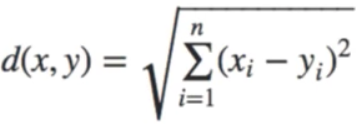

# Euclidean Distance




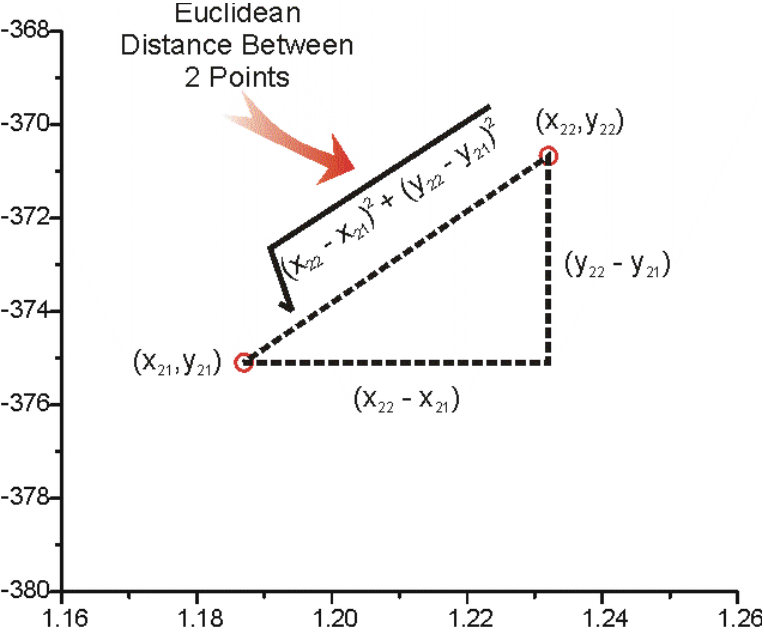

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors

In [2]:
import pandas as pd
url = "https://raw.githubusercontent.com/akdubey2k/ML/main/ML_18_KNN-K_Nearest_Neighbors_Algorithm/ML_18_big_mart_sales_train_dataset.csv"
df = pd.read_csv(url)
print("Total number of elements in dataframe".ljust(60, ' '), df.size)
print("Matrix of dataframe".ljust(60, ' '), df.shape)
print("\n")
df.head()

Total number of elements in dataframe                        102276
Matrix of dataframe                                          (8523, 12)




,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### Check the (null / na / NaN /empty) row from feature column

In [3]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Calculate the mean of **"Item_Weight"** (Regression)
#### Calculate mean or the median of the K-most similar instances.

In [4]:
item_weight_mean = df['Item_Weight'].mean()
item_weight_mean

12.857645184135976

Since **"Outlet_Size"** is a string feature, so we will use mode function of Pandas dataframe

### pandas.DataFrame.mode
#### DataFrame.mode(axis=0, numeric_only=False, dropna=True)
Get the mode(s) of each element along the selected axis.

The mode of a set of values is the value that appears most often. It can be multiple values.

#### Calculate the class (mode) with the highest frequency from the K-most similar instances

In [5]:
outlet_size_mode = df['Outlet_Size'].mode()
outlet_size_mode

0    Medium
Name: Outlet_Size, dtype: object

In [6]:
print("Item_Weight: No. of Null row".ljust(60, ' '), df['Item_Weight'].isnull().sum())
print("Outlet_Size: No. of Null row".ljust(60, ' '), df['Outlet_Size'].isnull().sum())

Item_Weight: No. of Null row                                 1463
Outlet_Size: No. of Null row                                 2410


#### Fill the (null / na / NaN /empty) row of feature column

### pandas.DataFrame.notnull
DataFrame.notnull()
DataFrame.notnull is an alias for DataFrame.notna.

Detect existing (non-missing) values.
#### Returns : DataFrame
Mask of bool values for each element in DataFrame that indicates whether an element is not an NA value.

In [7]:
# df['Item_Weight'] =
df['Item_Weight'].fillna(item_weight_mean, inplace=True)
# df['Outlet_Size'] =
df['Outlet_Size'].fillna(outlet_size_mode[0], inplace=True)

print("Item_Weight: No. of Null row".ljust(60, ' '), df['Item_Weight'].notnull().sum())
print("Outlet_Size: No. of Null row".ljust(60, ' '), df['Outlet_Size'].notnull().sum())

Item_Weight: No. of Null row                                 8523
Outlet_Size: No. of Null row                                 8523


Remove the **"Categorical"** Feature Column **['Item_Identifier', 'Outlet_Identifier']* from the dataframe

In [8]:
df.drop(['Item_Identifier', 'Outlet_Identifier'], axis='columns', inplace=True)
print("Matrix of dataframe".ljust(60, ' '), df.shape)
print("\n")
df.head()

Matrix of dataframe                                          (8523, 10)




,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


Why are we creating dummy variables here

In [9]:
df = pd.get_dummies(df)
print("Matrix of dataframe".ljust(60, ' '), df.shape)
df.head()

Matrix of dataframe                                          (8523, 36)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
1,5.92,0.019278,48.2692,2009,443.4228,False,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
2,17.50,0.016760,141.6180,1999,2097.2700,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
3,19.20,0.000000,182.0950,1998,732.3800,False,False,True,False,False,...,False,True,False,False,False,True,True,False,False,False
4,8.93,0.000000,53.8614,1987,994.7052,False,True,False,False,False,...,True,False,False,False,False,True,False,True,False,False


In [10]:
train, test = train_test_split(df, test_size=0.3)
print("Matrix of train dataset".ljust(60, ' '), train.shape)
print("Matrix of test dataset".ljust(60, ' '), test.shape)

Matrix of train dataset                                      (5966, 36)
Matrix of test dataset                                       (2557, 36)


### Drop target feature variable **"Item_Outlet_Sales"** from train and test dataset

In [11]:
X_train = train.drop(['Item_Outlet_Sales'], axis='columns')
y_train = train['Item_Outlet_Sales']

X_test = test.drop(['Item_Outlet_Sales'], axis='columns')
y_test = test['Item_Outlet_Sales']

In [12]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]}

knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)
model.fit(X_train, y_train)
print("model.best_params_".ljust(60, ' '), model.best_params_)
print("model.best_estimator_".ljust(60, ' '), model.best_estimator_)
print("model.best_score_".ljust(60, ' '), model.best_score_)

model.best_params_                                           {'n_neighbors': 7}
model.best_estimator_                                        KNeighborsRegressor(n_neighbors=7)
model.best_score_                                            0.4570940972089995
